In [4]:
import numpy as np
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
from sklearn.preprocessing import normalize
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import scipy as sc

In [5]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

In [12]:
import pylab
def plot_color(matrix, labels, filename=""):
    x = matrix[:, 0].tolist()
    y = matrix[:, 1].tolist()
    plt.figure(figsize=(6, 6))
    pylab.scatter(x, y, c=labels, cmap='Dark2')
    if(len(filename) > 0): plt.savefig(filename)

In [4]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    label_c = np.array([i for i in range(10)])
    plt.figure(figsize=(10, 10))  # in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i, :]
        plt.scatter(x, y, c=label_c)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom'
                     )

    plt.savefig(filename)

In [5]:
weights_e0 = np.load("layer1_epoch_0.npy")
weights_e1 = np.load("layer1_epoch_1.npy")
weights_e2 = np.load("layer1_epoch_2.npy")
weights_e3 = np.load("layer1_epoch_3.npy")
weights_e4 = np.load("layer1_epoch_4.npy")

# UMAP Projection

In [1]:
import umap

In [2]:
umap = umap.UMAP(n_neighbors=5, min_dist=0.1)

In [8]:
embeddings = umap.fit_transform(train_images[:1000])

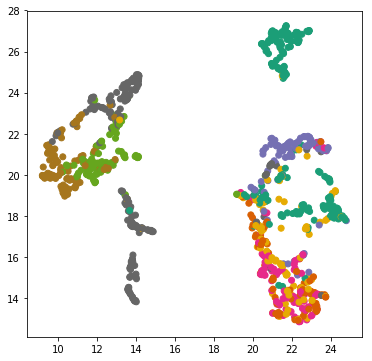

In [13]:
plot_color(embeddings, train_labels[:1000])

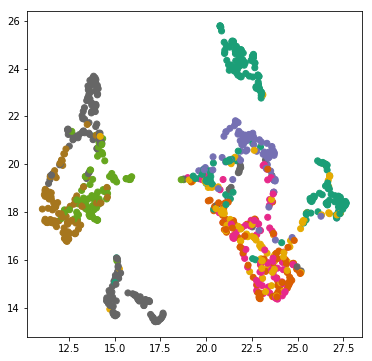

In [18]:
embeddings = umap.fit_transform(train_images[:1000])
plot_color(embeddings, train_labels[:1000])

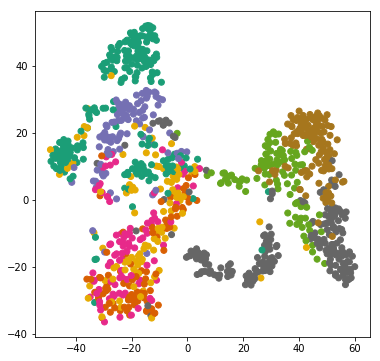

In [16]:
tsne = TSNE(perplexity=30, n_components=2, init='random', n_iter=5000)
lowd = tsne.fit_transform(train_images[:1000])
plot_color(lowd, train_labels[:1000])

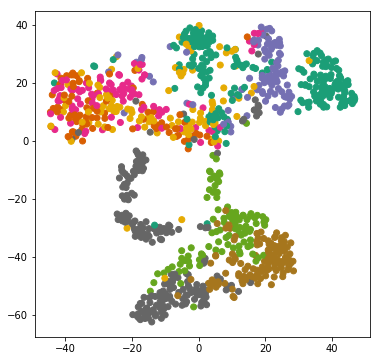

In [17]:
tsne = TSNE(perplexity=30, n_components=2, init='random', n_iter=5000)
lowd = tsne.fit_transform(train_images[:1000])
plot_color(lowd, train_labels[:1000])